# Twitter Sentiment Analysis

In [17]:
    ## Libraries
#!pip install textblob
#!pip install tweepy

In [1]:
    # to find the sentiment from the text
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt

# Connecting with twitter api 

In [2]:
    # consumer key = api key
consumer_key = 'Jt2KyyzI1oUBjwSRJJ01Xhplf'
    # consumer_secret = API key secret:
consumer_secret = 'NDPFqHim0tl8xnrIa7IUvRr0DOduj4k3JIBuTlOX54Nk4l8cSC'
access_token = '1128898749290426368-RhiqiVuoyt6bEeQYs2HOoMUr55nPB8'
access_token_secret = 'KEyeTGg6KTGvF3YSIuWIS4xNAjvLumrCFkVuAHwwKhnqB'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
search_term = 'Money Heist'
no_of_tweets = 1000

In [5]:
tweets = tweepy.Cursor(api.search, q = search_term).items(no_of_tweets)

# TextBlob

In [6]:
a = 'I am a bad cricket player'
b = 'I am a good cricket player'
c = 'I am a cricket player'

In [7]:
# getting the sentiment out of the text
TextBlob(a).sentiment.polarity

-0.6999999999999998

### 4.) Iterate the data and convert the result in percentage

In [8]:
positive = 0 
negative = 0 
neutral = 0 
polarity = 0

In [9]:
for tweet in tweets: 
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        neutral += 1
        
    elif(analysis.sentiment.polarity > 0):
        positive += 1
        
    elif(analysis.sentiment.polarity < 0):
        negative += 1
        

TweepError: Twitter error response: status code = 429

In [ ]:
positive

In [9]:
negative

0

In [10]:
neutral

0

In [11]:
polarity

0

# Define function to get percentage

In [115]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [116]:
positive = percentage(positive, no_of_tweets)
negative = percentage(negative, no_of_tweets)
neutral = percentage(neutral, no_of_tweets)
polarity = percentage(polarity, no_of_tweets)

In [117]:
polarity

3.671424723424724

# printing the results

In [118]:
print('Reaction of the people on ' + search_term + 
      ' by analyzing ' + str(no_of_tweets) + ' Tweets')

if(polarity == 0):
    print(" is 'Neutral'")
    
elif(polarity > 0): 
    print(" is 'Positive'")
    
elif(polarity < 0): 
    print(" is 'Negative'")

Reaction of the people on Trump by analyzing 1000 Tweets
 is 'Positive'


# Getting the result of the analysis

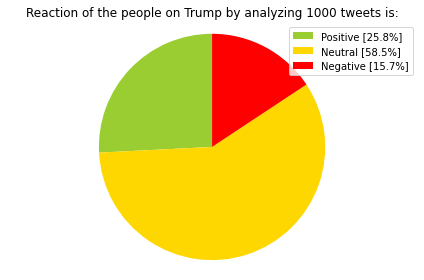

In [119]:
labels = ['Positive ['+str(positive)+'%]',
          'Neutral ['+str(neutral)+'%]',
          'Negative ['+str(negative)+'%]',
         ]

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = 'best')
plt.title('Reaction of the people on '
         + search_term + ' by analyzing '
         + str(no_of_tweets) + ' tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()